# MLP Classifier on MNIST dataset

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, \
ConfusionMatrixDisplay, plot_confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, train_test_split, \
GridSearchCV, StratifiedShuffleSplit

In [5]:
cv=StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

##Load dataset

In [6]:
X,y=fetch_openml('mnist_784',version=1, return_X_y=True)
X=X.to_numpy()
y=y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)

In [8]:
X_train=X_train/255
X_test=X_test/255

## Fit MLPClassifier on MNIST dataset

In [9]:
mlpc=MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [10]:
cv_score = cross_val_score(mlpc, X_train, y_train.ravel(),cv=cv)
print("Training Accuracy: {:.2f}%".format(cv_score.mean()*100))

Training Accuracy: 97.36%


In [11]:
mlpc.predict_proba(X_test[:5])

array([[6.27624820e-11, 1.20536306e-15, 6.72675090e-10, 2.00879465e-07,
        1.31325274e-17, 5.26025371e-15, 7.62063939e-20, 9.99999749e-01,
        2.41863508e-09, 4.73060527e-08],
       [3.02184791e-13, 1.08138777e-12, 9.99999999e-01, 9.03996098e-12,
        5.65234368e-30, 2.41632657e-14, 1.43398984e-13, 6.89085186e-30,
        5.61949143e-10, 1.15503424e-21],
       [7.84957141e-11, 9.99989931e-01, 8.80318255e-07, 1.22691107e-09,
        2.03041779e-09, 1.77448380e-08, 3.96759331e-09, 5.67878646e-07,
        8.59583279e-06, 3.70023398e-10],
       [1.00000000e+00, 3.85107223e-18, 2.97164523e-12, 1.69295199e-15,
        3.10608225e-20, 1.00441299e-16, 4.85397088e-12, 4.84551692e-13,
        1.08966869e-20, 1.52026950e-12],
       [2.00372258e-13, 8.24323676e-18, 3.54769196e-11, 7.06351620e-18,
        9.99974652e-01, 9.63540767e-14, 3.09441840e-13, 1.02730691e-10,
        1.52448226e-12, 2.53477952e-05]])

In [12]:
y_pred=mlpc.predict(X_test)

In [13]:
print("Train Accuracy: {:.2f}%".format(accuracy_score(y_train, mlpc.predict(X_train))*100))
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

Train Accuracy: 100.00%
Test Accuracy: 98.06%


## Confusion matrix plot

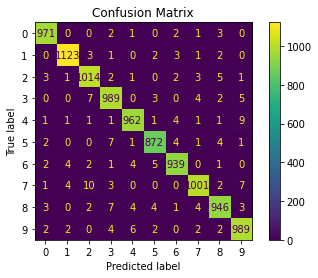

In [14]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [15]:
CR=classification_report(y_test,y_pred)
print('Classification report \n')
print(CR)

Classification report 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



##Plot of test data along with the predicted class labels

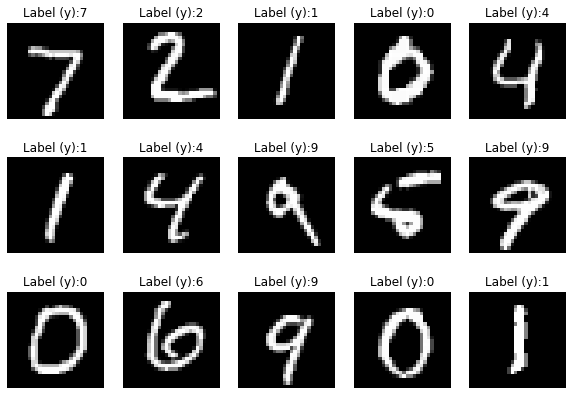

In [16]:
fig=plt.figure(figsize=(10,7))
for i in range(15):
  ax=fig.add_subplot(3,5,i+1)
  ax.imshow(X_test[i].reshape(28,28),cmap=plt.get_cmap('gray'))
  ax.set_title('Label (y):{y}'.format(y=y_pred[i]))
  plt.axis('off')

## Visulaization of multi layer perceptron weights in hidden layer

In [17]:
w=mlpc.coefs_
w=np.array(w[0])
w.shape

(784, 128)

In [18]:
w1=np.array(w[:,0])
w1.shape

(784,)

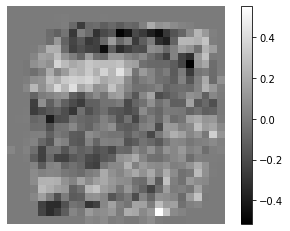

In [19]:
w_matrix=w1.reshape(28,28)
fig=plt.figure()
plt.imshow(w_matrix,cmap='gray')
plt.grid(False)
plt.axis(False)
plt.colorbar()
plt.show()

##Loss curve



Text(0.5, 1.0, 'Loss Curve')

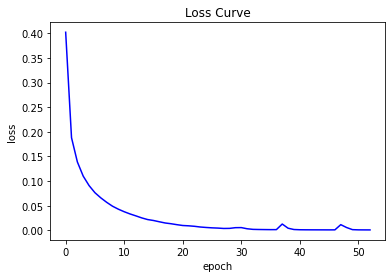

In [20]:
plt.plot(mlpc.loss_curve_,'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss Curve')

#MLPRegressor on California Housing Dataset

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [22]:
np.random.seed(306)
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

## Load Dataset

In [24]:
import sklearn
dataset= sklearn.datasets.fetch_california_housing()
X,y=dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [26]:
pipe=Pipeline([('scaler',StandardScaler()),
               ('regressor',MLPRegressor(hidden_layer_sizes=(32)))])
cv_results = cross_validate(pipe,
                            X_train,
                            y_train,
                            cv=cv,
                            scoring='neg_mean_absolute_percentage_error',
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs=2)

mlp_train_error=-1*cv_results['train_score']
mlp_test_error = -1*cv_results['test_score']

print(f"Mean absolute error of linear regression model on the train set:\n"
      f"{mlp_train_error.mean():.3f}+/- {mlp_train_error.std():.3f}")

print(f"Mean absolute error of linear regression model on the test set:\n"
      f"{mlp_test_error.mean():.3f}+/- {mlp_test_error.std():.3f}")

Mean absolute error of linear regression model on the train set:
0.213+/- 0.004
Mean absolute error of linear regression model on the test set:
0.213+/- 0.004


In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [28]:
mean_absolute_percentage_error(y_train,pipe.predict(X_train))

0.20517616916407086

In [29]:
mean_absolute_percentage_error(y_test,pipe.predict(X_test))

0.21680164186883186

Text(0, 0.5, 'predicted')

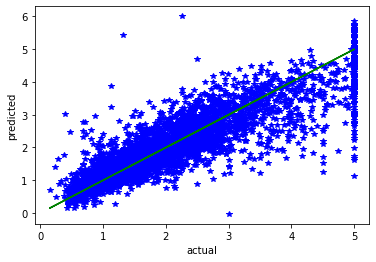

In [31]:
plt.plot(y_test,pipe.predict(X_test),'b*')
plt.plot(y_test,y_test,'g-')
plt.xlabel('actual')
plt.ylabel('predicted')

#Practice Assignment

In [32]:
df=pd.read_csv('/content/drive/Othercomputers/My MacBook Air (1)/IIT MADRAS DEGREE/Diploma/Data Science/MLP/Practice and Graded Assignment Solutions/Week 12/diabetes.csv')

In [33]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [35]:
features=df[df.keys()[:-1]]
label=df[df.keys()[-1]]

In [36]:
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


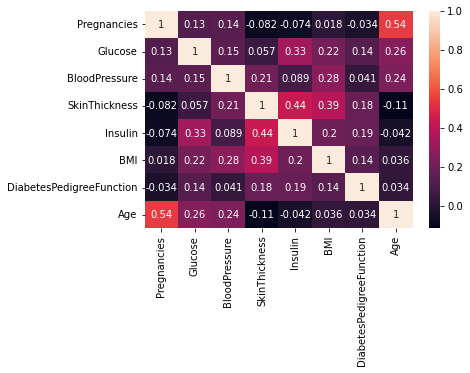

In [39]:
import seaborn as sns
sns.heatmap(features.corr(),annot=True)

In [40]:
features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [41]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
X_train,X_test,y_train,y_test=train_test_split(features, label,test_size=0.2, random_state=1)

In [67]:
mlcp_pipe=Pipeline([('scaler',StandardScaler()),
                    ('classifier',MLPClassifier(activation='relu',
                                                solver='sgd',
                                                hidden_layer_sizes=(10,10,10),
                                                alpha=1e-4,
                                                learning_rate_init=0.2,
                                                max_iter=500,
                                                random_state=1))])

In [68]:
mlcp_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10),
                               learning_rate_init=0.2, max_iter=500,
                               random_state=1, solver='sgd'))])

In [53]:
print(accuracy_score(y_train, mlcp_pipe.predict(X_train)))
print(mlcp_pipe.score(X_train,y_train))

0.8159609120521173
0.8159609120521173


In [49]:
accuracy_score(y_test,mlcp_pipe.predict(X_test))

0.7727272727272727

In [54]:
mlcp_pipe[-1].out_activation_

'logistic'

In [71]:
#shape of coefs
mlcp_pipe[-1].coefs_[0].shape

(8, 10)

In [72]:
mlcp_pipe[-1].intercepts_[0].shape

(10,)

In [69]:
mlcp_pipe[-1].n_layers_

5

#Graded Questions

In [76]:
grdf=pd.read_csv('/content/drive/Othercomputers/My MacBook Air (1)/IIT MADRAS DEGREE/Diploma/Data Science/MLP/Practice and Graded Assignment Solutions/Week 12/AirQualityUCI.csv')

In [79]:
grdf=grdf.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16' ],axis=1)

In [81]:
grdf

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
grdf=grdf.dropna()

In [83]:
grdf.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [85]:
grdf.shape

(9357, 13)

In [86]:
grdf.corr()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041411,0.128351,-0.031378,0.029926,0.526451,-0.089981,0.671127,-0.073724,0.080310,-0.068939,-0.048227,-0.045892
PT08.S1(CO),0.041411,1.000000,0.170007,0.852687,0.933102,0.277993,0.087019,0.154030,0.845149,0.892434,0.754844,0.745375,0.764903
NMHC(GT),0.128351,0.170007,1.000000,0.037323,0.110104,-0.004427,0.048821,0.103307,0.162680,0.101185,-0.000009,0.008284,0.012500
C6H6(GT),-0.031378,0.852687,0.037323,1.000000,0.767433,-0.001174,0.512193,-0.010992,0.774673,0.641334,0.971375,0.925062,0.984555
PT08.S2(NMHC),0.029926,0.933102,0.110104,0.767433,1.000000,0.331272,-0.073667,0.176488,0.874782,0.909905,0.669025,0.585803,0.646572
NOx(GT),0.526451,0.277993,-0.004427,-0.001174,0.331272,1.000000,-0.436084,0.817139,0.035546,0.461889,-0.138452,-0.053009,-0.095847
PT08.S3(NOx),-0.089981,0.087019,0.048821,0.512193,-0.073667,-0.436084,1.000000,-0.256232,0.122734,-0.208865,0.588111,0.573549,0.621618
NO2(GT),0.671127,0.154030,0.103307,-0.010992,0.176488,0.817139,-0.256232,1.000000,-0.022174,0.253439,-0.084104,-0.081305,-0.060440
PT08.S4(NO2),-0.073724,0.845149,0.162680,0.774673,0.874782,0.035546,0.122734,-0.022174,1.000000,0.723690,0.755060,0.640707,0.691913
PT08.S5(O3),0.080310,0.892434,0.101185,0.641334,0.909905,0.461889,-0.208865,0.253439,0.723690,1.000000,0.503700,0.524955,0.519467


In [87]:
y=grdf.pop('AH')

In [89]:
X=grdf

In [90]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [91]:
mlp_reg_pipe=Pipeline([('scaler',StandardScaler()),
                       ('regressor',MLPRegressor(hidden_layer_sizes=(50,50,50),tol=1e-2, alpha=1e-4,solver="adam", learning_rate_init=0.1, max_iter=50, random_state=1))])
mlp_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              learning_rate_init=0.1, max_iter=50,
                              random_state=1, tol=0.01))])

In [92]:
X_test.shape

(1872, 12)

In [93]:
mlp_reg_pipe.score(X_train,y_train)

0.999992602958679

In [94]:
mlp_reg_pipe.score(X_test,y_test)

0.9999920781245708

In [98]:
X_train.iloc[0,:]

CO(GT)              4.5
PT08.S1(CO)      1326.0
NMHC(GT)         -200.0
C6H6(GT)           22.2
PT08.S2(NMHC)    1356.0
NOx(GT)           448.0
PT08.S3(NOx)      525.0
NO2(GT)            95.0
PT08.S4(NO2)     1966.0
PT08.S5(O3)      1405.0
T                  20.8
RH                 61.4
Name: 5160, dtype: float64

In [100]:
mlp_reg_pipe.predict(X_train)[0]

1.5977531509180736